# АБ-тестирование на основе ЦПТ

In [24]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline


def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

Есть Винни-Пух и он торгует мёдом. Винни-пух решил проверить что произойдет в его онлайн-магазине с покупками, если он сделает редизайн сайта. Редизайн ему подсказали UX-исследователи. Теперь ВП хочет проверить что будет с конверсиями пользователей в покупки. 

- Treatment: $p_T$ - ей он показывает новый сайт $(5\% от всех пользователей)$
- Conrol: $p_C$ - ей он показывает старый сайт 

$H_0: p_T - p_C = 0$

$H_A: p_T - p_C > 0$

__1. Эксперимент__ 

Предпосылки теста:

- Мы должны отдавать себе отчёт, что все наблюдения должны быть независимы и одинаково распределены, чтобы тест на основе ЦПТ работал.
- Много наблюдений, мы работаем с биг-датой.
- У наших наблюдений конечная дисперсия (ни одно из наблюдений особо сильно не выделяется на фоне всех остальных). Иначе говоря у нас нес выбросов в данных. 



__2. Союзник:__



$$
\bar X_n \overset{asy}{\sim} N \left( \mathbb{E}(X_i), \frac{Var(X_i)}{n} \right)
$$

__3. Данные и модель:__

Две выборки независят друг от друга, так как пользователь случайно относится к одной из двух групп. 

\begin{equation*}
    \begin{aligned}
         & X^c_1, \ldots, X^c_{n_c} \sim idd \quad Bern(p_c) \\
         & X^T_1, \ldots, X^T_{n_T} \sim idd \quad Bern(p_T) 
    \end{aligned}
\end{equation*}

__4. Критерий для проверки__

С помощью ЦПТ я могу выписать следующую логику: 

\begin{equation*}
    \begin{aligned}
        & \bar X_{n_c} = \hat p_c \overset{asy}{\sim} N \left( p_c, \frac{ p_c\cdot (1 - p_c)}{n_c} \right) \approx  N \left( p_c, \frac{ \hat p_c\cdot (1 - \hat p_c)}{n_c} \right)  \\
        & \bar X_{n_T} = \hat p_T \overset{asy}{\sim} N \left( p_T, \frac{ p_T\cdot (1 - p_T)}{n_T} \right) \approx N \left( p_T, \frac{ \hat p_T\cdot (1 - \hat p_T)}{n_T} \right)
    \end{aligned}
\end{equation*}

$$
\hat p_c - \hat p_T \overset{asy}{\sim} N \left( p_c - p_T, \frac{ \hat p_c\cdot (1 - \hat p_c)}{n_c} + \frac{ \hat p_T \cdot (1 - \hat p_T)}{n_T}  \right)
$$

А дальше мы говорим: "А пусть у нас верна нулевая гипотеза, мы верим в статус-кво и нам нужны доказательства что он нарушен".

$$
\hat p_c - \hat p_T \underset{H_0}{\overset{asy}{\sim}} N \left(0, \frac{ \hat p_c\cdot (1 - \hat p_c)}{n_c} + \frac{ \hat p_T \cdot (1 - \hat p_T)}{n_T}  \right)
$$

$$
Z = \frac{\hat p_c - \hat p_T}{ \sqrt{ \frac{\hat p_c\cdot (1 - \hat p_c)}{n_c} + \frac{ \hat p_T \cdot (1 - \hat p_T)}{n_T}}} \underset{H_0}{\overset{asy}{\sim}} N (0, 1)
$$



Ечли у нас наблюдаемое значение $z_{obs}$ оказывается в хвосте распределения, это означает что расстоение между долями очень большое. Видимо, разница между ними действительно есть. 

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/FUlyankin/matstat_coursera/main/week09_hypo/data/matan.csv', sep='\t')
df.dropna(inplace=True)
df.shape

(348, 2)

In [26]:
df.is_angry.value_counts()

0    208
1    140
Name: is_angry, dtype: int64

In [30]:
df_agg = df.groupby('is_angry')['target_1'].agg(['mean', 'sum', 'count'])
df_agg

,mean,sum,count
is_angry,,,
0,0.721154,150.0,208
1,0.735714,103.0,140


In [31]:
p_a = df_agg['mean'].loc[1]
p_l = df_agg['mean'].loc[0]

n_a = df_agg['count'].loc[1]
n_l = df_agg['count'].loc[0]

d_mean = p_a - p_l
d_std = np.sqrt(p_a*(1 - p_a)/n_a + p_l*(1 - p_l)/n_l)

0.3820887057419452

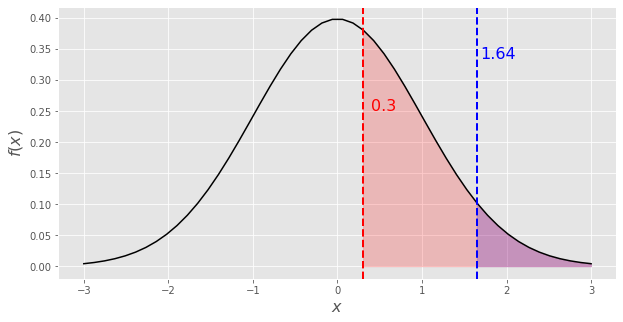

In [32]:
asy_mean_test(d_mean , d_std, mu_0=0, 
                   alpha=0.05, alternative='larger', margin=3)

In [34]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05                                            # уровень значимости = 5%
n_obs = df_agg['count'].loc[1], df_agg['count'].loc[0]  # размеры выборок
m_obs = df_agg['sum'].loc[1], df_agg['sum'].loc[0]      # число успехов

z_obs, p_val =  proportions_ztest(m_obs, n_obs, value=0, 
                                  alternative='larger')

print(f"Наблюдаемое значение: {z_obs:.3}") 
print(f"P-значение: {p_val:.3}");

Наблюдаемое значение: 0.299
P-значение: 0.382


Понятное дело, что по анлогии это делается для любых средних! То есть вы можете попробовать предположить, что выборка пришла из какого-то другого распределения, понять как выглядит дисперсия и подготовить асимптотический критерий. 

> Остаётся много вопросиков про то, а как правильно спланировать эксперимент. Например, сколько надо наблюдений? 

# Планирование эксперимента

Нам надо как-то увязать между собой следующие показатели: 

- MDE (Minimal detectable effect)
- ошибка 1 рода
- ошибка 2 рода 
- количество наблюдений $n_c,n_T$
- как должны между собой соотноситься $n_c$ и $n_T$


__Способы выбрать $q$__

Наш бюджет на эксперимент всегда ограничен. Мы всего можем собрать $n$ наблюдений, из которых в группу воздействия попадёт $q \cdot n$, то есть $n_T = q \cdot n$ и $n_c = (1 - q) \cdot n$. Как выбрать $q$? 


__1)__  От балды: $q = 0.5$.


__2)__  Хочется, чтобы дисперсия была поменьше, то есть: 


$$
Var(\hat p_T - \hat p_c) = \frac{p_T \cdot (1 - p_T)}{q \cdot n} + \frac{p_c \cdot (1 - p_c)}{(1 - q) \cdot n}  \to \min_q
$$

Если мы решим эту задачу, тогда у нас поулчится

$$
q = \frac{\sqrt{p_T \cdot (1 - p_T)} }{\sqrt{p_T \cdot (1 - p_T)} + \sqrt{p_c \cdot (1 - p_c)} }
$$


Скорее всего, все революционные идеи уже сделаны. Скорее всего, наши группы в целом похожи. $MDE$ маленькое. То есть $q \approx 0.5.$ 

Либо если вы верите, что ваши изменения революционные и перевернут мир, можно запустить дорогой двухшаговый эксперимент, где за первую неделю вы получите точечную оценку для $q$, а на второй неделе с выверенной пропорцией уже проверите гипотезу. 

__3)__ Обычно есть продукт сам по себе. Обычно для АБ-теста от этого продукта отсекают маленькую долю людей, например $1\%$. Нужно просто понять хватает ли нам для детекции эффекта $1\%$ или надо увеличить долю. 

__4)__  Выбрать $q$ так, чтобы минимизировать $\beta$. Ниже мы подумали над этой идеей и она совпала с идеей номер 2. 

__Ищем оптимальное $n$__

- Перед началом эксперимента сами выбираем $\alpha = \mathbb{P}(H_A \mid H_0)$
- Из здравого смысла, отталкиваясь от того измение в каком знаке после запятой для нас будет существенным, мы выбираем $MDE$
- Остаётся только $\beta$, которая как-то связана с предыдущими двумя показателями. Её обычно минимизируют по остаточному принципу. 

Давайте проведёмс вычисления, которые свяжут эти три показателя для ситуации, когда $q = 0.5$.

Критерий для двусторонней альтернативы: 

$$
\left| \frac{\hat d - 0}{se(\hat d)} \right| > z_{1-\frac{\alpha}{2}} \quad \Rightarrow \quad \text{отвергаем } H_0
$$

Когда мы выписали такой критерий, мы обеспечиил требуемое $\alpha$!


$$
\beta = \mathbb{P}(H_0 \mid H_a) = \mathbb{P} \left( \hat d < z_{1 - \frac{\alpha}{2}} \cdot se(\hat d)  \mid d \ge MDE \right) \le \mathbb{P} \left( \hat d < z_{1 - \frac{\alpha}{2}} \cdot se(\hat d)  \mid d = MDE \right) =  ?
$$

$$
\hat d \underset{H_0}{\overset{asy}{\sim}} N (0, se^2(\hat d))
$$

$$
\hat d \underset{H_a}{\overset{asy}{\sim}} N (MDE, se^2(\hat d))
$$

$$
? = \mathbb{P}\left( \frac{\hat d - MDE}{se(\hat d)} \le \frac{z_{1 - \frac{\alpha}{2} \cdot se(\hat d) - MDE} }{se (\hat d) } \mid d = MDE \right)  =  \mathbb{P}\left( N(0,1) \le \frac{z_{1 - \frac{\alpha}{2} \cdot se(\hat d) - MDE} }{se (\hat d) } \right) = F_{N(0,1)} \left( \frac{z_{1 - \frac{\alpha}{2} \cdot se(\hat d) - MDE} }{se (\hat d) } \right) = \beta 
$$

__Определение__

Число $q$ для которого выполняется $F_X(X \le q) = \gamma$ называется квантилем уровня $\gamma$. 

$$
\frac{z_{1 - \frac{\alpha}{2} \cdot se(\hat d) - MDE} }{se (\hat d) } = z_{\beta}
$$

$$
\frac{MDE}{se(\hat d)} = z_{1 - \frac{\alpha}{2}} - z_{\beta}
$$

$$
\frac{MDE}{se(\hat d)} = z_{1 - \frac{\alpha}{2}} + z_{1 - \beta}
$$

$$
\frac{MDE}{z_{1 - \frac{\alpha}{2}} + z_{1 - \beta}} = se(\hat d) 
$$

$$
\left( \frac{MDE}{z_{1 - \frac{\alpha}{2}} + z_{1 - \beta}} \right)^2 = Var(\hat d) = \frac{ \hat p_c\cdot (1 - \hat p_c)}{n_c} + \frac{ \hat p_T \cdot (1 - \hat p_T)}{n_T}
$$

$$
\left( \frac{MDE}{z_{1 - \frac{\alpha}{2}} + z_{1 - \beta}} \right)^2 = \frac{ \hat p_c\cdot (1 - \hat p_c)}{(1- q) \cdot n} + \frac{ \hat p_T \cdot (1 - \hat p_T)}{q \cdot n}
$$

Пусть $q = 0.5$

$$
\left( \frac{MDE}{z_{1 - \frac{\alpha}{2}} + z_{1 - \beta}} \right)^2 = \frac{ \hat p_c\cdot (1 - \hat p_c) + \hat p_T \cdot (1 - \hat p_T)}{0.5 \cdot n}
$$

$$
n = \frac{ \hat p_c\cdot (1 - \hat p_c) + \hat p_T \cdot (1 - \hat p_T)}{0.5 MDE^2} \cdot (z_{1 - \frac{\alpha}{2}} + z_{1 - \beta})^2
$$

__Упражнение:__ 

$f(p) = p \cdot (1 - p) = p - p^2$

$f'(p) = 1 - 2 p = 0 \Rightarrow p = 0.5$

$f''(p) = - 2 < 0 \Rightarrow$ максимум

$f(0.5) = 0.5 \cdot (1 - 0.5) = 0.25$

Давайте сделаем на $n$ грубую оценку. Воспользуемся тем, что $p \cdot (1 - p) \le 0.25 $

$$
n = \frac{ \hat p_c\cdot (1 - \hat p_c) + \hat p_T \cdot (1 - \hat p_T)}{0.5 MDE^2} \cdot (z_{1 - \frac{\alpha}{2}} + z_{1 - \beta})^2 \le  \frac{0.5}{0.5 MDE^2} \cdot (z_{1 - \frac{\alpha}{2}} + z_{1 - \beta})^2 = \frac{(z_{1 - \frac{\alpha}{2}} + z_{1 - \beta})^2}{MDE^2}
$$

$$
n =  \frac{(z_{1 - \frac{\alpha}{2}} + z_{1 - \beta})^2}{MDE^2}
$$

__Упражнение:__

Менеджерка Сова к аналитику Пяточку и говорит: 

- Хочу понять как изменятся конверсии на сайте, если мы его поменяем. 
- Какой MDE тебя устроит? 
- Ну наверное 0.001 сойдёт.
- Какую ошибку первого и второго рода ты готова совершить? 
- Нулевые. 
- Тогда нам нужно бесконечно много наблюдений.

Сова после такого ответа уходит подмумать, возвращается к Пяточку и говорит: 

- А какие есть вообще варианты? 
- А сейчас я нарисую тебе табличку!


In [47]:
def get_n(MDE, alpha, beta):
    za = stats.norm().ppf(1 - alpha/2)
    zb = stats.norm().ppf(1 - beta)
    return ((za + zb)/MDE)**2

In [57]:
MDE = 0.1

alphas = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]
betas = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2]

Errors = [ ]
for a in alphas:
    cur_error = []
    for b in betas:
        e = get_n(MDE, a, b)#/10**6
        cur_error.append(e)
    Errors.append(cur_error)

df_e = pd.DataFrame(Errors)
df_e.columns = alphas
df_e.index = betas
df_e

,0.001,0.010,0.020,0.050,0.100,0.200
0.001,4071.408590,3154.928033,2856.128214,2435.797928,2090.389995,1707.464681
0.010,3210.425417,2403.134108,2143.299444,1781.416440,1487.938717,1167.896817
0.020,2933.934085,2164.757772,1918.524784,1577.044136,1301.693837,1003.602827
0.050,2550.448257,1837.246935,1610.989120,1299.471001,1050.742306,784.887973
0.100,2242.103879,1577.044136,1367.966073,1082.217382,856.384735,618.255723
0.200,1911.249422,1301.693837,1112.422927,856.384735,656.949766,450.786273


Скорее всего, все революционные идеи уже сделаны. Скорее всего, эффект от изменений на сайте будет не очень большим. 

## Задание:

__а)__ понять как будут выглядеть все аналогичные формулы для гипотезы о равенстве средних

__б)__ понять как будут выгдять формулы для ситуации когда $q\ne 0.5$

__в)__ понять как будут выглядять формулы, когда пользователей у нас очень много и мы хотим решить какой процент от них отрезать для теста, а всё отсальное у нас это контроль 



# Рандомные мысли про идею 4

$$
\beta  = F_{N(0,1)} \left(z_{1 - \frac{\alpha}{2}} -  \frac{MDE}{ \sqrt{ \frac{p_T \cdot (1 - p_T)}{q \cdot n} + \frac{p_c \cdot (1 - p_c)}{(1 - q) \cdot n} }  } \right) \to \min_{q}
$$

$$
\beta  = F_{N(0,1)} \left(z_{1 - \frac{\alpha}{2}} -  \frac{MDE}{ \sqrt{ \frac{0.25}{q \cdot n} + \frac{0.25}{(1 - q) \cdot n} }  } \right) \to \min_{q}
$$

Так как $F(t)$ это функция распределения, она монотонно возрастает. Получается, что для минимизации мы должны сделать её аргумент по $q$ как можно меньше. 


$$
z_{1 - \frac{\alpha}{2}} -  \frac{MDE}{ \sqrt{ \frac{p_T \cdot (1 - p_T)}{q \cdot n} + \frac{p_c \cdot (1 - p_c)}{(1 - q) \cdot n} }  } \to \min_{q}
$$


$$
\frac{MDE}{ \sqrt{ \frac{p_T \cdot (1 - p_T)}{q \cdot n} + \frac{p_c \cdot (1 - p_c)}{(1 - q) \cdot n}}} \to \max_{q}
$$

$$
\frac{p_T \cdot (1 - p_T)}{q \cdot n} + \frac{p_c \cdot (1 - p_c)}{(1 - q) \cdot n} \to \min_{q}
$$

$$
Var(\hat p_T - \hat p_c) \to \min_{q}
$$

$\beta(q)$ - ?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


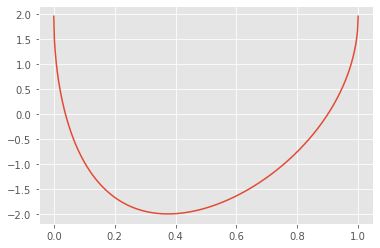

In [60]:
alpha = 0.05
MDE = 0.1 
n = 1000

pt = 0.1 
pc = 0.5

def beta(q):
    qq = np.sqrt(pt*(1-pt)/(q*n) + pc*(1-pc)/((1-q)*n))
    h = stats.norm().ppf(1 - alpha/2) - MDE/qq
    return h

q = np.linspace(0, 1, 500)
plt.plot(q, beta(q));